오늘은 부산문화재단의 정책연구센터에서 인턴으로 근무할 때 참여했던 '부산형 비대면 문화예술 활동 환경 구축을 위한 사례 조사 연구'에서 국내 문화예술계 공공기관의 유튜브 운영 현황 분석을 위해 작성한 분석 보고서를 정리해보았습니다. 본 연구는 코로나19로 인한 예술활동의 환경 변화를 분석하고 부산시 비대면 문화예술 생태계 구축을 위해 진행되었으며, 저는 그 중에서 국내 문화예술계 공공기관의 유튜브 운영 현황 분석을 기획하고 진행하였습니다.\
 보고서의 전체 내용은 [부산문화재단 전자아카이브](http://e-archive.bscf.or.kr/27_policy/01_policy.php?idx=1697&pmode=view&path=MyQkJCQkJA==)에서 확인할 수 있습니다.

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib import font_manager, rc

%matplotlib inline

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 30)

sns.set_style("darkgrid")
path = '/usr/share/fonts/NanumGothicCoding.ttf'
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

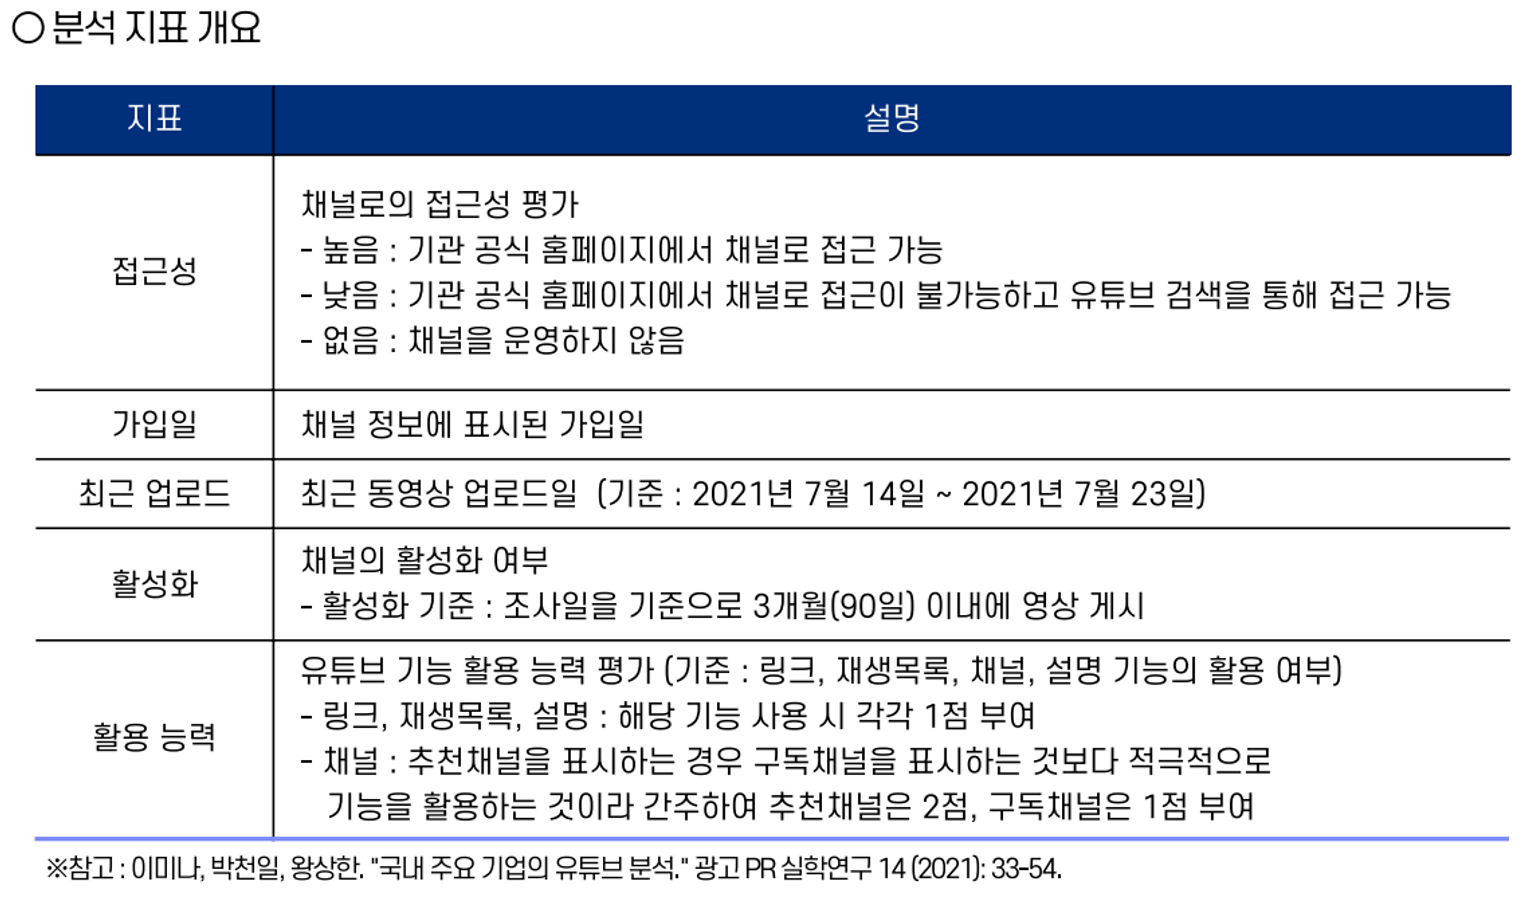

데이터를 수집하기에 앞서 분석 지표를 위의 표와 같이 설정하였습니다. 분석 지표를 바탕으로 noxinfluencer에서 채널별 데이터를 수집하였습니다. 수집한 데이터를 먼저 불러왔습니다.

In [72]:
df = pd.read_csv('youtube.csv')
df.head()

,기관분류,기관명,접근성,링크,재생목록,채널,설명,가입일,최근 업로드,기준,업로드 기간,동영상 개수,평균 조회수,조회수,구독자
0,미술관,국립현대미술관,2,1,16,0,1,2013-05-14,2021-07-10,2021-07-14,4,883,11900,6538000,19700
1,미술관,서울시립미술관,2,1,12,2,1,2012-07-02,2021-06-30,2021-07-14,14,390,383,252700,3500
2,미술관,부산시립미술관,2,1,9,0,1,2015-07-24,2021-07-09,2021-07-14,5,168,167,76600,비공개
3,미술관,부산현대미술관,2,0,6,1,1,2018-07-19,2021-05-07,2021-07-14,68,97,453,33300,457
4,미술관,대구문화예술회관 미술관,2,0,0,0,1,2020-07-14,2021-05-14,2021-07-14,61,26,44,1168,13


# 1. 데이터 정제

## 1.1. '-'로 표시된 결측치를 None으로 변경

우선 불러온 데이터에는 '-'로 결측치가 표시되어 있습니다. '-'로 표시한 결측치를 None으로 변경해주었습니다. 구독자의 '비공개'와 최근 업로드의 '없음'도 함께 None으로 변경하였습니다.

In [73]:
cols = df.columns.drop(['기관분류', '기관명', '접근성'])

for col in cols:
    df[col] = df[col].apply(lambda x: None if x == '-' else x)

df['구독자'] = df['구독자'].apply(lambda x: None if x == '비공개' else x)
df['최근 업로드'] = df['최근 업로드'].apply(lambda x: None if x == '없음' else x)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기관분류    321 non-null    object
 1   기관명     321 non-null    object
 2   접근성     321 non-null    int64 
 3   링크      239 non-null    object
 4   재생목록    239 non-null    object
 5   채널      239 non-null    object
 6   설명      239 non-null    object
 7   가입일     239 non-null    object
 8   최근 업로드  237 non-null    object
 9   기준      240 non-null    object
 10  업로드 기간  237 non-null    object
 11  동영상 개수  239 non-null    object
 12  평균 조회수  239 non-null    object
 13  조회수     239 non-null    object
 14  구독자     222 non-null    object
dtypes: int64(1), object(14)
memory usage: 37.7+ KB


## 1.2. 가입연도 추출

가입일에서 연도만 추출한 컬럼을 새로 추가하였습니다.

In [74]:
df['가입 연도'] = df['가입일'].apply(lambda x: x[:4] if x != None else x)
df.head()

,기관분류,기관명,접근성,링크,재생목록,채널,설명,가입일,최근 업로드,기준,업로드 기간,동영상 개수,평균 조회수,조회수,구독자,가입 연도
0,미술관,국립현대미술관,2,1,16,0,1,2013-05-14,2021-07-10,2021-07-14,4,883,11900,6538000,19700,2013
1,미술관,서울시립미술관,2,1,12,2,1,2012-07-02,2021-06-30,2021-07-14,14,390,383,252700,3500,2012
2,미술관,부산시립미술관,2,1,9,0,1,2015-07-24,2021-07-09,2021-07-14,5,168,167,76600,None,2015
3,미술관,부산현대미술관,2,0,6,1,1,2018-07-19,2021-05-07,2021-07-14,68,97,453,33300,457,2018
4,미술관,대구문화예술회관 미술관,2,0,0,0,1,2020-07-14,2021-05-14,2021-07-14,61,26,44,1168,13,2020


## 1.3. 데이터 타입 변경

다음으로 문자열로 되어있는 데이터 타입을 수치형으로 변경하였습니다.

In [75]:
cols = df.columns.drop(['기관분류', '기관명', '가입일', '최근 업로드', '기준', '가입 연도'])
df[cols] = df[cols].astype(float)
df['가입일'] = df['가입일'].astype('datetime64')

## 1.4. 재생목록 사용 여부 추가

'재생목록' 열은 채널에서 생성한 재생목록의 개수를 나타냅니다. 재생목록 사용 여부를 나타내는 '재생목록 사용' 파생 변수를 생성하였습니다.

In [76]:
df['재생목록 사용'] = df['재생목록'].apply(lambda x: 1 if x > 0 else x)

## 1.5. 활용능력 추가

'활용 능력'은 기관의 유튜브 기능 활용 능력을 나타내는 지표로, 링크, 재생목록, 채널, 설명 기능의 활용 여부를 수치화한 지표입니다. 링크, 재생목록, 설명 기능을 사용하는 경우는 각각 1점의 점수를 부여했으며, 채널 기능은 추천 채널을 표시하는 것이 구독 채널을 표시하는 것보다 적극적으로 기능을 활용하는 것이라 간주하여 추천 채널은 2점, 구독 채널은 1점을 부여하였습니다. 이에 따라 5점 만점의 '활용 능력' 컬럼을 추가하였습니다.

In [77]:
df['활용능력'] = df['링크'] + df['채널'] + df['설명'] + df['재생목록 사용']

In [78]:
df['활용능력'].value_counts()

3.0    71
2.0    54
1.0    40
4.0    26
0.0    25
5.0    23
Name: 활용능력, dtype: int64

## 1.6. 전체 평균 조회수 추가

원래 데이터에 평균 조회수가 있지만 이는 최근 30개 영상의 평균 조회수를 나타냅니다. 따라서 전체 조회수를 동영상 개수로 나눈 '전체 평균 조회수'를 생성하였습니다.

In [79]:
df['전체 평균 조회수'] = df['조회수'] / df['동영상 개수']

# 동영상 개수(분모)가 0인 경우 전체 평균 조회수를 0으로 변경
df['전체 평균 조회수'] = df['전체 평균 조회수'].apply(lambda x: 0 if x==float('inf') else x)

## 1.7. 활성화 여부 추가

채널이 현재 운영중인지를 나타내는 '활성화'를 새로 추가하였습니다. 활성화의 기준은 최근 90일 내에 영상을 업로드 한 경우로 1의 값을 가지며, 그렇지 않은 경우 비활성화라고 판단하여 0의 값을 가지게 하였습니다.

In [80]:
df['활성화'] = df['업로드 기간'].apply(lambda x: 1 if x <= 90 
                               else 0 if x > 90 
                               else None)

# 2. 데이터 분석

데이터 정제 과정을 완료한 후 본격적으로 데이터 분석을 실시하였습니다.

## 2.1. 유튜브 가입 시기 분석

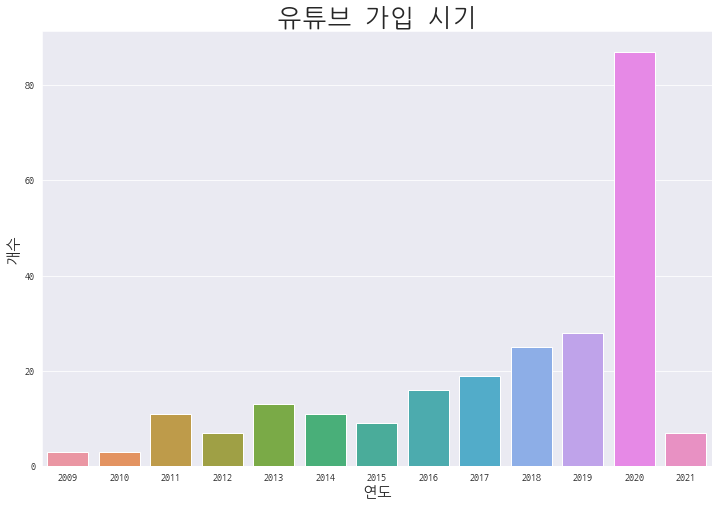

In [81]:
plt.figure(figsize=(12, 8))

label = np.arange(2009, 2022).astype(np.str_)
sns.countplot(x=df['가입 연도'], order=label)

plt.title('유튜브 가입 시기', fontsize=25)
plt.xlabel('연도', fontsize=15)
plt.ylabel('개수', fontsize=15);

국내 문화예술계 공공기관의 유튜브 채널 개설은 꾸준히 증가하는 추세였으나 2020년에 그 수가 확연히 증가했음을 알 수 있습니다. 코로나19로 인해 대면 활동이 불가능해지자 기관에서 대면 채널의 대안으로 유튜브를 개설했음을 예상할 수 있습니다.

### 2.1.1. 기관 분류에 따른 유튜브 가입 시기 분석

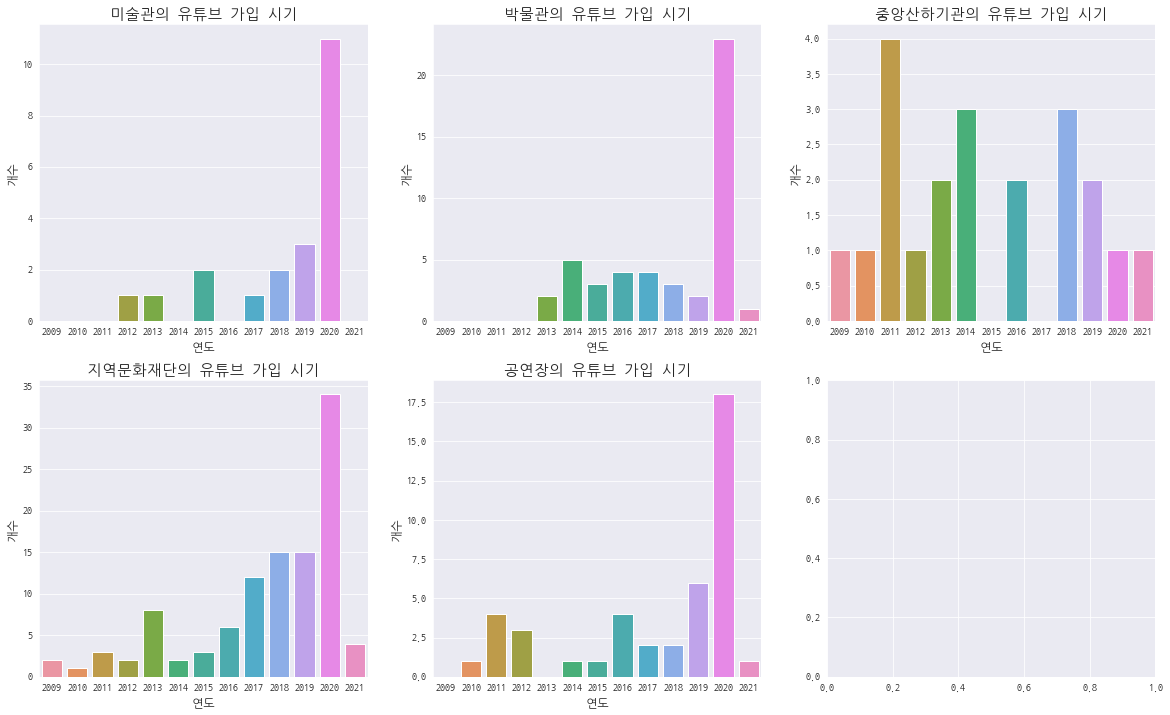

In [82]:
plt.subplots(2, 3, figsize=(20, 12))

types = df['기관분류'].unique()
for i, tp in zip(range(1, 6), types):
    plt.subplot(2, 3, i)
    tmp = df[df['기관분류'] == tp]
    sns.countplot(x=tmp['가입 연도'], order=label)
    plt.title(f'{tp}의 유튜브 가입 시기', fontsize=15)
    plt.xlabel('연도', fontsize=12)
    plt.ylabel('개수', fontsize=12)

plt.show()

2010년부터 빠르게 유튜브 채널을 개설한 중앙산하기관을 제외하고는 모두 2020년에 가장 많은 채널이 개설되었습니다. 미술관과 박물관은 각각 2012년, 2013년에 처음으로 채널이 개설되어 다른 기관에 비해 다소 시작이 늦고 2020년 이전까지는 뚜렷한 증가세도 보이지 않아 유튜브 사용에 보수적이었음을 알 수 있습니다. 공연장과 지역문화재단은 코로나 이전부터 꾸준히 증가하고는 있었으나, 코로나의 영향으로 가속화되었음을 확인할 수 있습니다.

## 2.2. 유튜브 채널 접근성 분석

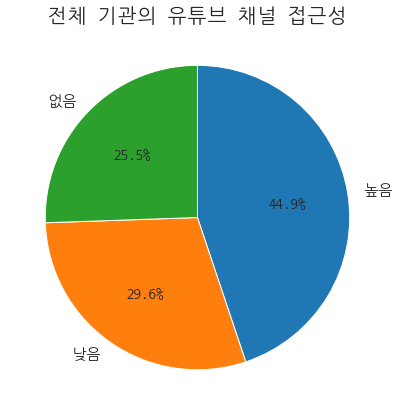

In [83]:
x = list(df['접근성'].value_counts().values)
labels = ['높음', '낮음', '없음']

fig, ax = plt.subplots(figsize=(7, 7))
wedges, texts, autotexts = ax.pie(x,
                                  labels=labels,
                                  autopct='%.1f%%',
                                  startangle=90,
                                  counterclock=False,)

ax.set_title('전체 기관의 유튜브 채널 접근성', fontdict={'fontsize': 20})

for t in texts:
    t.set_fontsize(15)

for a in autotexts:
    a.set_fontsize(15)

plt.show()

320개의 기관 중 238개의 기관(74.5%)이 유튜브 채널을 보유하고 있습니다. 이때 접근성은 유튜브 채널로의 접근성으로 '높음'은 기관 홈페이지에서 유튜브 채널로 바로 접근이 가능하고 '낮음'은 공식 홈페이지에서 접근이 불가능하여 다른 사이트에서 검색하여 접근이 가능함을 의미합니다.

### 2.2.1. 기관 분류에 따른 유튜브 채널 접근성 분석

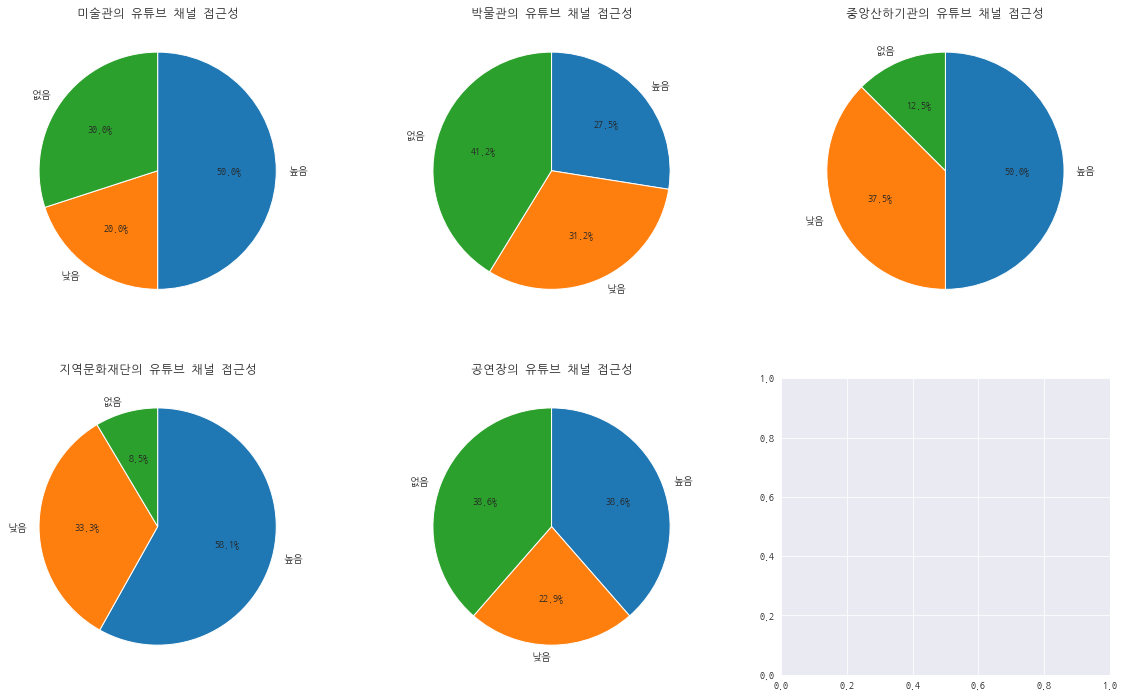

In [84]:
plt.subplots(2, 3, figsize = (20, 12))

types = df['기관분류'].unique()
for i, tp in zip(range(1, 6), types):
    cond = df['기관분류'] == tp
    x = df['접근성'][cond].value_counts().sort_index(ascending = False)
    labels = ['높음', '낮음', '없음']
    
    plt.subplot(2, 3, i)
    plt.pie(x, labels = labels,
           autopct = '%.1f%%',
           startangle = 90,
           counterclock = False)
    
    plt.title(f'{tp}의 유튜브 채널 접근성')

plt.show()

기관별로 유튜브 채널의 접근성을 살펴보았습니다. 박물관은 2020년에 유튜브 개설이 급증했음에도 불구하고, 유튜브 채널을 운영하는 기관이 40%로 여전히 유튜브 운영에 소극적임을 알 수 있습니다. 또한 중앙산하기관과 지역문화재단의 경우 약 90%가 유튜브를 운영하고 있지만, 접근성 높음 대비 접근성 낮음의 비율이 다른 기관에 비해 높아 이에 대한 노력이 부족하다고 할 수 있습니다.

## 2.3. 기관 분류에 따른 구독자 분석

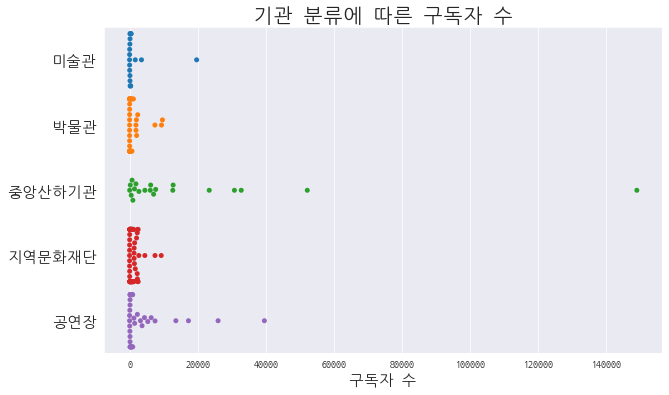

In [85]:
plt.subplots(figsize=(10, 6))

sns.swarmplot(x='구독자', y='기관분류', data=df)
plt.title('기관 분류에 따른 구독자 수', fontsize=20)
plt.xlabel('구독자 수', fontsize=15)
plt.ylabel('')
plt.yticks(fontsize=15)

plt.show()

대부분의 채널이 구독자 수가 2만명 미만인 가운데, 하나의 채널만이 구독자가 10만 이상인 것을 확인할 수 있습니다. 10만 명이 넘는 채널은 분석에 방해가 되어 잠시 제외하고 분석을 실시하도록 하겠습니다.

In [86]:
df_org = df.copy()
df = df.drop(133, axis=0)

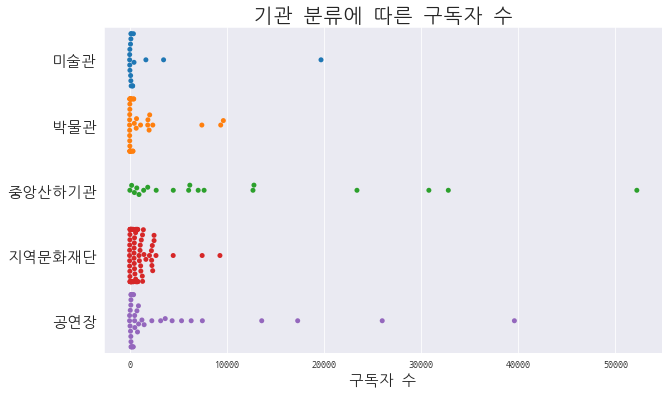

In [87]:
plt.subplots(figsize=(10, 6))

sns.swarmplot(x='구독자', y='기관분류', data=df)
plt.title('기관 분류에 따른 구독자 수', fontsize=20)
plt.xlabel('구독자 수', fontsize=15)
plt.ylabel('')
plt.yticks(fontsize=15)

plt.show()

구독자가 10만 이상인 채널을 제외하고 그래프를 다시 그린 결과, 대다수의 채널이 구독자가 1만 명 이하라는 것을 확인할 수 있습니다. 그중에서도 중앙산하기관과 공연장의 구독자수가 준수한 편인데, 중앙산하기관의 경우 채널이 생성된지 오래되어 구독자가 확보되었을 것이라 예상할 수 있습니다. 그리고 지역문화재단의 경우에는 유튜브 채널을 운영하는 비율은 가장 높았지만, 모든 채널의 구독자가 1만명 미만으로 운영 대비 성과가 떨어진다고 해석할 수 있습니다.

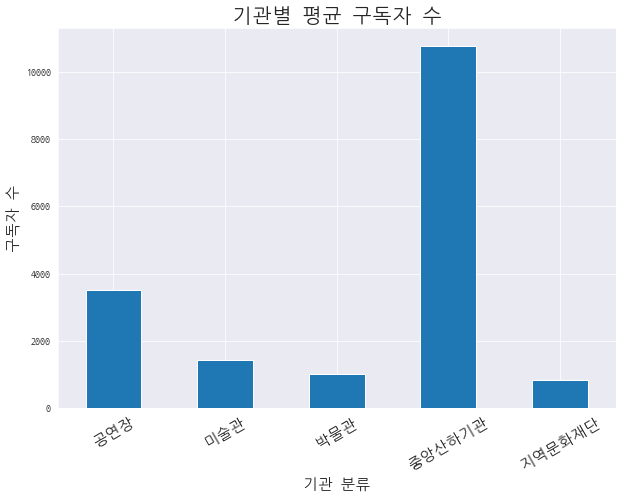

In [95]:
df.groupby('기관분류').mean()[['구독자']].plot(kind = 'bar', figsize = (10, 7), legend = False)
plt.title('기관별 평균 구독자 수', fontsize = 20)
plt.xlabel('기관 분류', fontsize = 15)
plt.ylabel('구독자 수', fontsize = 15)
plt.xticks(fontsize = 15, rotation = 30)
#plt.yticks(range(6))
plt.show()

## 2.4. 동영상 개수와 구독자의 회귀 분석

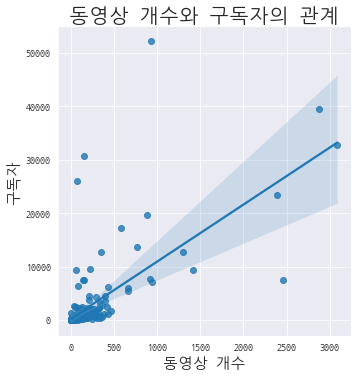

In [91]:
sns.lmplot('동영상 개수', '구독자', data=df)
plt.title('동영상 개수와 구독자의 관계', fontsize = 20)
plt.xlabel('동영상 개수', fontsize = 15)
plt.ylabel('구독자', fontsize = 15);

In [89]:
from scipy.stats import pearsonr

tmp = df.dropna(subset=['동영상 개수', '구독자'])
corr, p_value = pearsonr(tmp['동영상 개수'], tmp['구독자'])
print(f'상관계수 : {corr:.2f}, p-value : {p_value}')

상관계수 : 0.69, p-value : 3.625998356024918e-32


동영상 개수와 구독자 수는 상관계수가 0.69로 두 변수 간에 강한 양의 상관관계가 있다고 할 수 있습니다. 다시 말해 동영상의 개수가 많을수록 구독자수도 많다고 말할 수 있습니다. 또한 p-value는 유의수준인 0.05보다 훨씬 작은 값을 가지므로, 두 변수 간에는 상관관계는 통계적으로 유의하다고 할 수 있습니다.

## 2.5. 활용능력과 구독자의 관계 분석

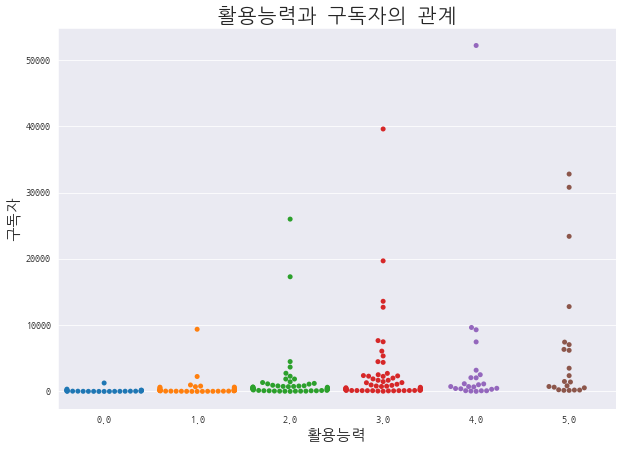

In [92]:
plt.subplots(figsize = (10, 7))

sns.swarmplot(x = '활용능력', y = '구독자', data = df)

plt.title('활용능력과 구독자의 관계', fontsize = 20)
plt.xlabel('활용능력', fontsize = 15)
plt.ylabel('구독자', fontsize = 15)

plt.show()

유튜브 기능 활용능력과 구독자 사이에 뚜렷한 상관 관계는 존재하지 않지만, 구독자가 많으면 활용능력도 높다는 것을 일부 확인할 수 있습니다.

## 2.6. 기관별 평균 활용 능력

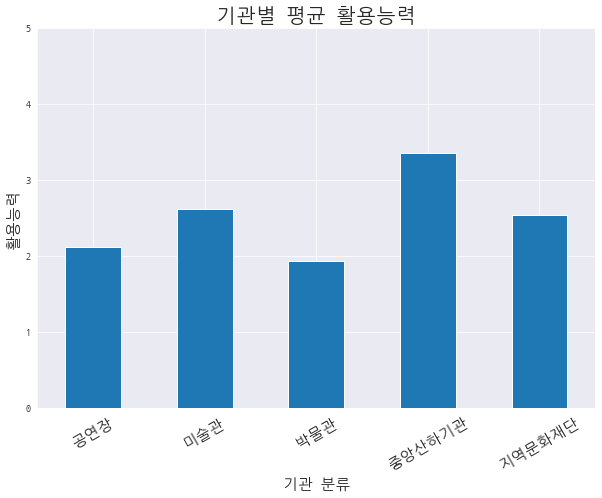

In [93]:
df.groupby('기관분류').mean()[['활용능력']].plot(kind = 'bar', figsize = (10, 7), legend = False)
plt.title('기관별 평균 활용능력', fontsize = 20)
plt.xlabel('기관 분류', fontsize = 15)
plt.ylabel('활용능력', fontsize = 15)
plt.xticks(fontsize = 15, rotation = 30)
plt.yticks(range(6))
plt.show()

평균 구독자수가 가장 높은 중앙산하기관의 평균 활용능력 점수도 가장 높았음을 확인할 수 있습니다. 박물관의 평균 활용 능력이 가장 낮은 것과 앞서 유튜브 개설이 늦었던 것을 합쳐볼 때, 박물관은 유튜브 개설과 운영에 보수적인 포지션을 취하고 있음을 알 수 있습니다.

## 2.7. 기관별 유튜브 비활성화 비율

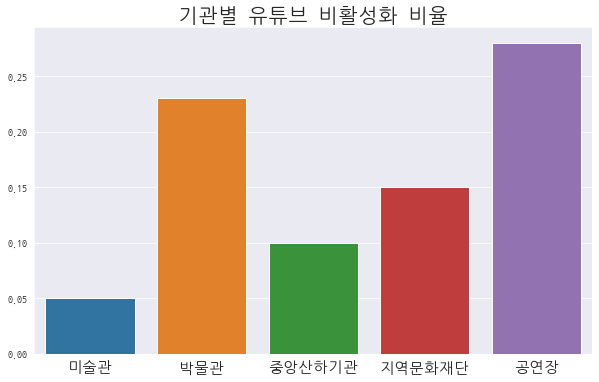

In [96]:
types = df['기관분류'].unique()
pcts = []
for tp in types:
    son = len(df[(df['기관분류'] == tp)&(df['활성화'] == 0)])
    mom = len(df[(df['기관분류'] == tp)&(df['접근성'] != 0)])
    pct = round(son/mom, 2)
    pcts.append(pct)
    
plt.subplots(figsize = (10, 6))

sns.barplot(types, pcts)

plt.title('기관별 유튜브 비활성화 비율', fontsize = 20)
plt.xticks(fontsize = 15)

plt.show()

In [103]:
pcts

[0.05, 0.23, 0.1, 0.15, 0.28]

비활성화 비율은 '비활성화 채널의 개수 / 전체 채널의 개수'로 생성된 유튜브 채널 중에서 비활성화된 채널이 차지하고 있는 비율을 나타냅니다. 공연장과 박물관의 비활성화 비율이 가장 높았습니다.

## 2.8. 기관별 평균 조회수

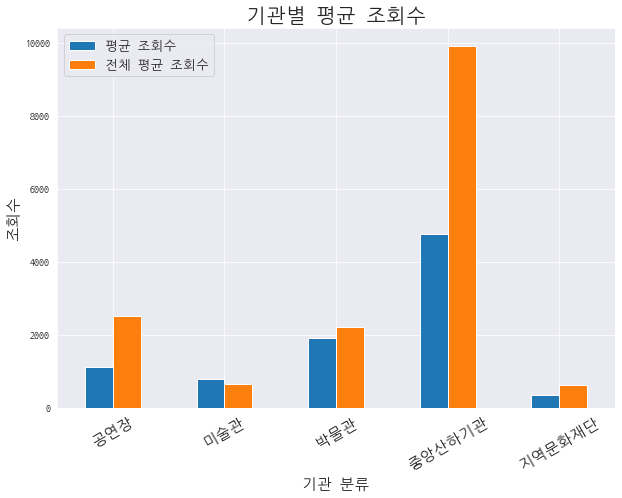

In [104]:
df.groupby('기관분류').mean()[['평균 조회수', '전체 평균 조회수']].plot(kind = 'bar', figsize = (10, 7))
plt.title('기관별 평균 조회수', fontsize = 20)
plt.xlabel('기관 분류', fontsize = 15)
plt.ylabel('조회수', fontsize = 15)
plt.legend(fontsize = 13)
plt.xticks(fontsize = 15, rotation = 30)
plt.show()

전체 평균 조회수는 채널 전체 동영상의 조회수를 반영하기 때문에, 영상 업로드 기간이 길수록 조회수가 높은 경향이 있습니다. 그에 반해 평균 조회수는 최근 30개 동영상의 조회수 평균이기에, 동영상 게시 기간에 비교적으로 자유롭습니다.\
중앙산하기관의 경우 다른 기관에 비해 빠르게 유튜브를 개설했고, 구독자수도 많기 때문에 전체 평균 조회수가 압도적으로 높았습니다. 평균 조회수도 다른 기관에 비해 높았는데, 이는 중앙산하기관의 평균 구독자수가 많기 때문에 자연스러운 결과라고 할 수 있습니다.\
지역문화재단은 다른 기관에 비해 조회수가 둘 다 현저히 낮은 모습이었습니다.

# 3. 분석 결론

- 전체 기관의 **74.5%가 유튜브 채널을 보유**하고 있다.
    - 중앙산하기관을 제외한 모든 기관이 2020년에 코로나19의 영향을 받고 채널 개설에 박차를 가했습니다. 
    - 그중 박물관은 채널 개설이 가장 늦었으며 이후 뚜렷한 증가세도 없고, 채널을 개설하지 않은 비율이 41.2%로 여전히 채널 개설에 보수적인 모습입니다. 이는 국립중앙박물관의 e뮤지엄, 온라인 전시관과 같이 다른 비대면 채널이 이미 구축되어있기 때문에 필요를 못느끼는 것으로 추측됩니다.



- 채널의 성과지표 : **구독자 수**
    - 일반적으로 구독자가 많으면 동영상 조회수도 높기 때문에 구독자 수를 채널의 성과 지표로 활용할 수 있습니다. 하지만 표본 중에 구독자가 10만을 넘는 채널은 1개에 불과하고, 1만을 넘지 못하는 기관이 210개로 매우 부진한 성과를 기록하였습니다. 
    - 이는 코로나로 인해 대면 채널이 차단되자 급히 그 대안으로 유튜브 채널을 개설하였고, 체계적으로 구축된 비대면 문화예술 환경이 아니었기 때문에 이런 결과가 나왔다고 해석하였습니다.